In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


In [8]:
folder_path = r"C:\Users\Kaleb\OneDrive\Documents\AC\data\data"
file_name = "benin-malanville.csv"
file_path = os.path.join(folder_path, file_name)

In [9]:
df = pd.read_csv(file_path)

In [10]:
print("🔹 First 5 rows:")
print(df.head())

🔹 First 5 rows:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [ ]:
print("\n🔹 Summary statistics:")
print(df.describe())


🔹 Summary statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%       

In [12]:
print("\n🔹 Missing values:")
print(df.isnull().sum())


🔹 Missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [13]:
if df['Comments'].isnull().sum() == len(df):
    df.drop(columns=['Comments'], inplace=True)
    print("\nℹ️ 'Comments' column dropped since it's entirely missing.")


ℹ️ 'Comments' column dropped since it's entirely missing.


In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [15]:
df.set_index('Timestamp', inplace=True)

In [16]:
df_daily = df.resample('D').mean()

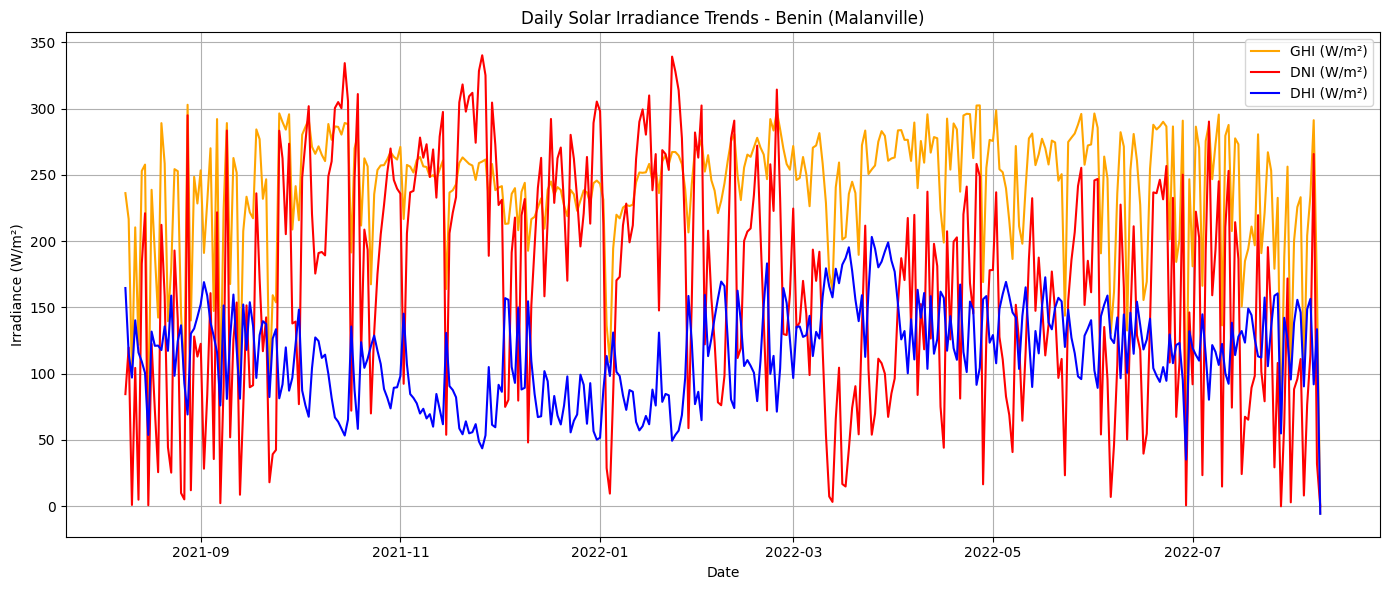

In [17]:
plt.figure(figsize=(14, 6))
plt.plot(df_daily.index, df_daily['GHI'], label='GHI (W/m²)', color='orange')
plt.plot(df_daily.index, df_daily['DNI'], label='DNI (W/m²)', color='red')
plt.plot(df_daily.index, df_daily['DHI'], label='DHI (W/m²)', color='blue')
plt.title('Daily Solar Irradiance Trends - Benin (Malanville)')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

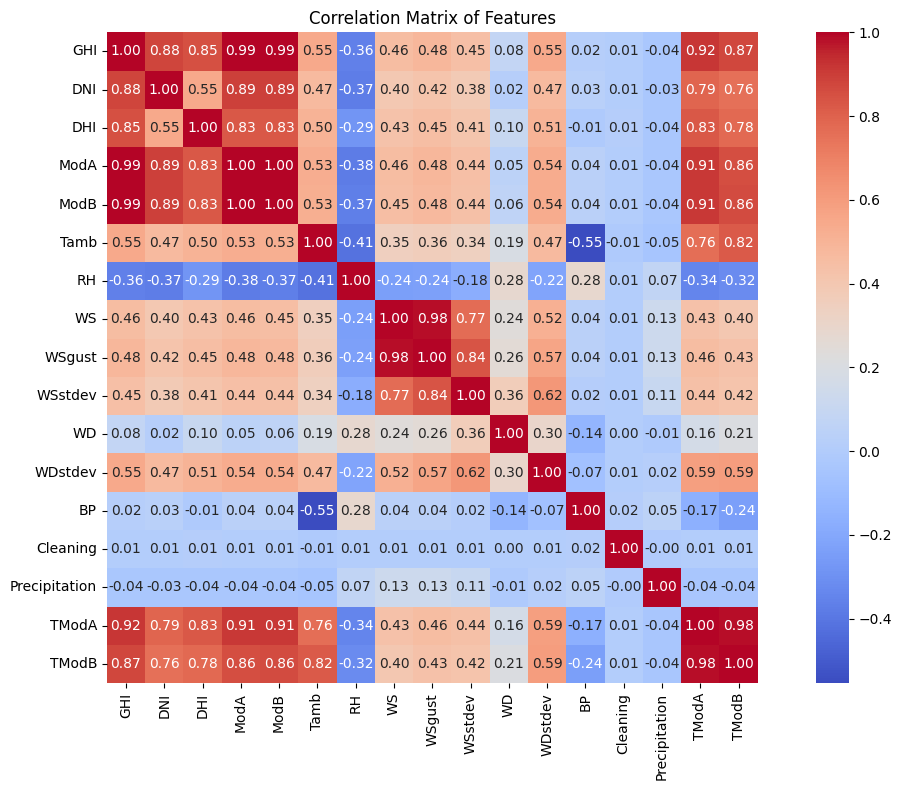

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

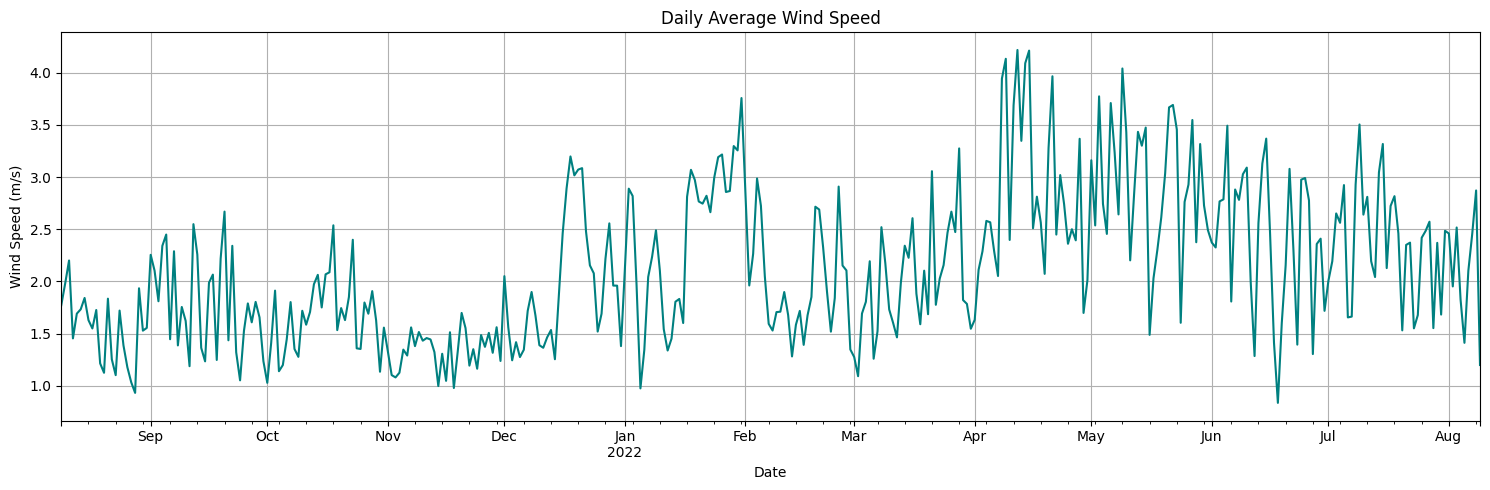

In [19]:
plt.figure(figsize=(15, 5))
df['WS'].resample('D').mean().plot(label='Wind Speed', color='teal')
plt.title("Daily Average Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

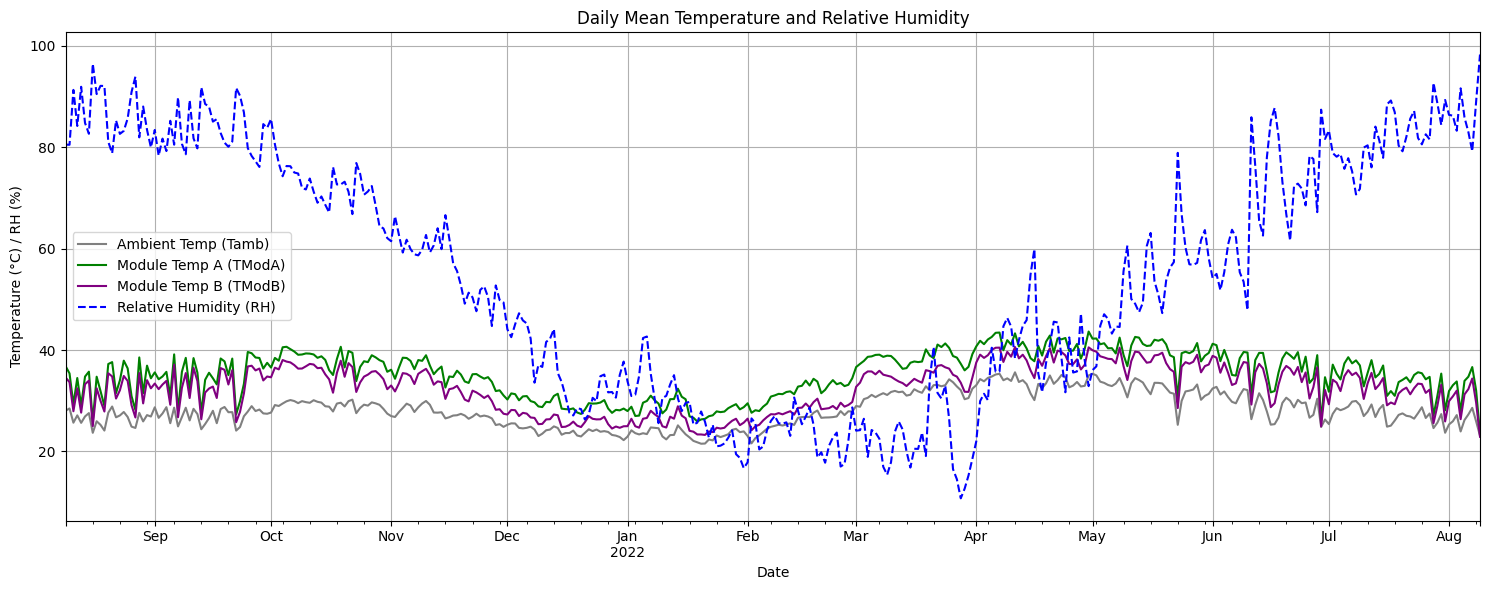

In [20]:
import matplotlib.pyplot as plt

# Temperature and RH over time (Daily mean)
plt.figure(figsize=(15, 6))

df['Tamb'].resample('D').mean().plot(label='Ambient Temp (Tamb)', color='gray')
df['TModA'].resample('D').mean().plot(label='Module Temp A (TModA)', color='green')
df['TModB'].resample('D').mean().plot(label='Module Temp B (TModB)', color='purple')
df['RH'].resample('D').mean().plot(label='Relative Humidity (RH)', color='blue', linestyle='--')

plt.title("Daily Mean Temperature and Relative Humidity")
plt.ylabel("Temperature (°C) / RH (%)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


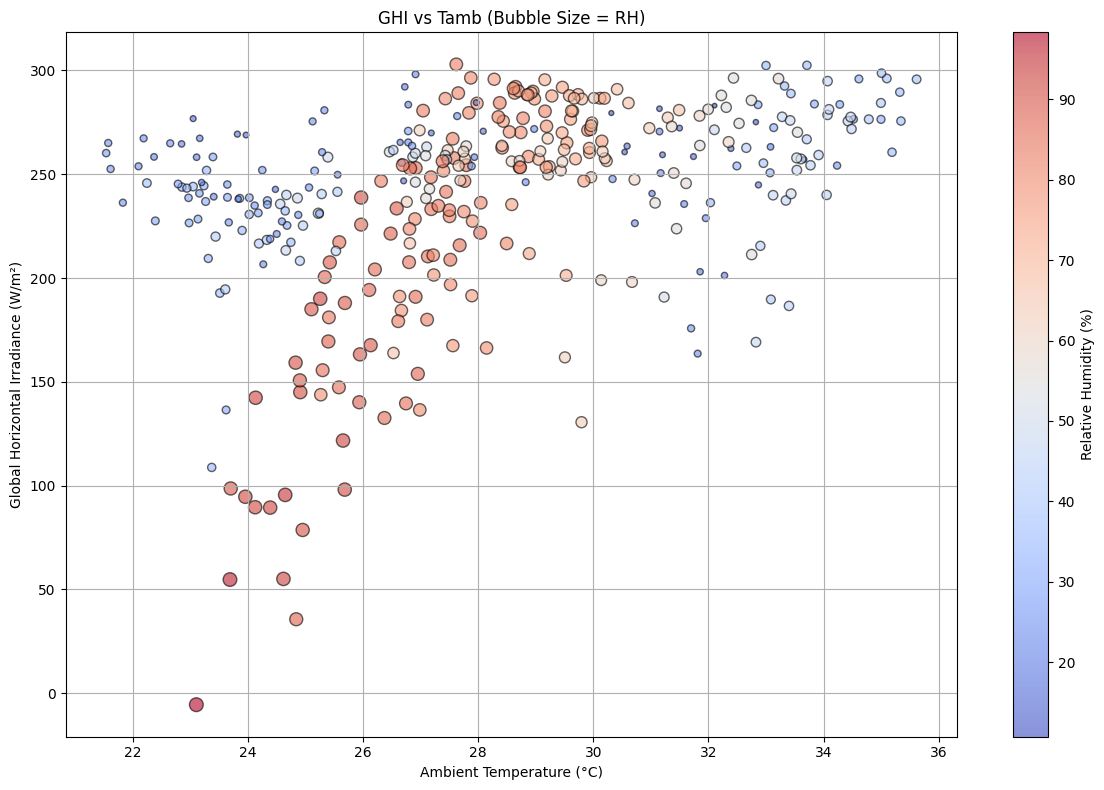

In [21]:
# Bubble Chart: GHI vs Tamb with bubble size = RH
plt.figure(figsize=(12, 8))

# Daily means to simplify and smooth the data
bubble_data = df[['GHI', 'Tamb', 'RH']].resample('D').mean().dropna()

plt.scatter(
    x=bubble_data['Tamb'],
    y=bubble_data['GHI'],
    s=bubble_data['RH'],          # Bubble size = RH
    c=bubble_data['RH'],          # Optional: color by RH
    cmap='coolwarm',
    alpha=0.6,
    edgecolors='black'
)

plt.title("GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.colorbar(label="Relative Humidity (%)")
plt.grid(True)
plt.tight_layout()
plt.show()
